In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Dense,Conv2D, Dropout, MaxPooling2D,Flatten
from keras.models import Sequential
from keras import backend as K
from keras.models import load_model
from keras import utils

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
not_normal = load_images_from_folder("NOT_NORMAL")
normal = load_images_from_folder("NORMAL")

In [5]:
print(str(len(not_normal)/len(normal)) + " Is the rate of two categories ")

0.1 Is the rate of two categories 


In [6]:
#Data has imblance issue, 
#applying oversampeling method on not_normal 

In [7]:
not_normal[0].shape

(650, 1028, 3)

In [8]:
normal[0].shape

(1317, 1857, 3)

In [9]:
#difference in shape need to deal with

In [10]:
for img in normal:
    img = cv.resize(img, (1028,650))

In [11]:
normal_resized = [cv.resize(img, (1028,650)) for img in normal]
not_normal_resized = [cv.resize(img, (1028,650)) for img in not_normal]

In [12]:
normal_resized[0].shape

(650, 1028, 3)

In [13]:
generator = ImageDataGenerator(rotation_range=10 , brightness_range=[0.6,1.4], zoom_range=[0.8,1.2], horizontal_flip=True, height_shift_range=None,
                               width_shift_range=None)

In [14]:
aug_it = generator.flow(np.expand_dims(normal_resized[0],0))
aug_images = [next(aug_it)[0].astype(np.uint8) for i in range(10)]

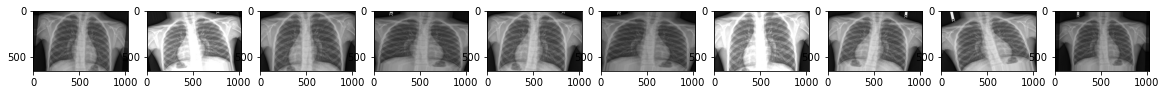

In [15]:
#Augmented images sample
fig, axes = plt.subplots(1,10, figsize=(20,5))
for img,ax in zip(aug_images, axes):
    ax.imshow(img)

In [16]:
def aug_all(list):
    all_images =[]
    i=1
    for img in list:
        aug_iter = generator.flow(np.expand_dims(img,0))
        #generate 10 of each image
        aug_image = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
        all_images.extend(aug_image)
        print(i)
        i+=1
    return(all_images)        

In [17]:
not_normal_aug = aug_all(not_normal_resized)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [18]:
len(not_normal_aug)
#600 not_normal images created

600

In [19]:
not_normal_aug[0].shape

(650, 1028, 3)

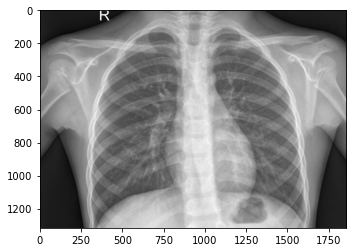

In [20]:
plt.imshow(normal[0])

In [21]:
train_X = normal_resized + not_normal_aug

In [22]:
train_X[0].shape

(650, 1028, 3)

In [23]:
len(normal_resized), len(not_normal_aug)

(600, 600)

In [24]:
#generate label for data
#[[1,0]] normal label, [[0,1]] not_normal label 
a = np.array([[1,0]]*600)
b = np.array([[0,1]]*600)

In [25]:
train_Y = np.row_stack((a,b))

In [26]:
train_Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [27]:
#shuffle datatrai
trainX, trainy = shuffle(train_X, train_Y, random_state=42)

(<matplotlib.image.AxesImage at 0x2c5a0ecd700>, array([0, 1]))

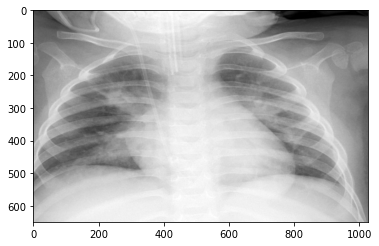

In [28]:
plt.imshow(trainX[0]), trainy[0]

In [29]:
train_X_arr = np.stack(trainX)
trainy.shape, train_X_arr.shape # correct shape for model 
# data in ready for training

((1200, 2), (1200, 650, 1028, 3))

In [30]:
print("Tensorflow-version:", tf.__version__)

Tensorflow-version: 2.6.0


In [192]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(650, 1028, 3))

In [55]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation='relu', input_shape=(650, 1028, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2,activation="softmax"))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 649, 1027, 16)     208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 216, 342, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 215, 341, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 113, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 112, 32)       4128      
_________________________________________________________________
flatten (Flatten)            (None, 250880)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                8

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [58]:
(xtrain,xtest,ytrain,ytest)=train_test_split(train_X_arr,trainy,test_size=0.2,random_state=42)
print(xtrain.shape, xtest.shape,ytrain.shape,ytest.shape)

(960, 650, 1028, 3) (240, 650, 1028, 3) (960, 2) (240, 2)


In [59]:
xtrain = xtrain/255
xtest = xtest/255

In [60]:
history = model.fit(xtrain, ytrain, epochs=5,batch_size=100)

Epoch 1/5
10/10 [==============================] - 83s 5s/step - loss: 4.0763 - accuracy: 0.5312
Epoch 2/5
10/10 [==============================] - 53s 5s/step - loss: 0.6747 - accuracy: 0.6833
Epoch 3/5
10/10 [==============================] - 51s 5s/step - loss: 0.3275 - accuracy: 0.9010
Epoch 4/5
10/10 [==============================] - 52s 5s/step - loss: 0.1702 - accuracy: 0.9458
Epoch 5/5
10/10 [==============================] - 52s 5s/step - loss: 0.1248 - accuracy: 0.9500


In [76]:
Ypred = model.predict(xtest)

In [77]:
Ypred = np.argmax(Ypred, axis=1)

In [78]:
Ypred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [79]:
Ytrue = np.argmax(ytest, axis=1)
Ytrue

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

Text(0.5, 144.41374999999996, 'Predicted')

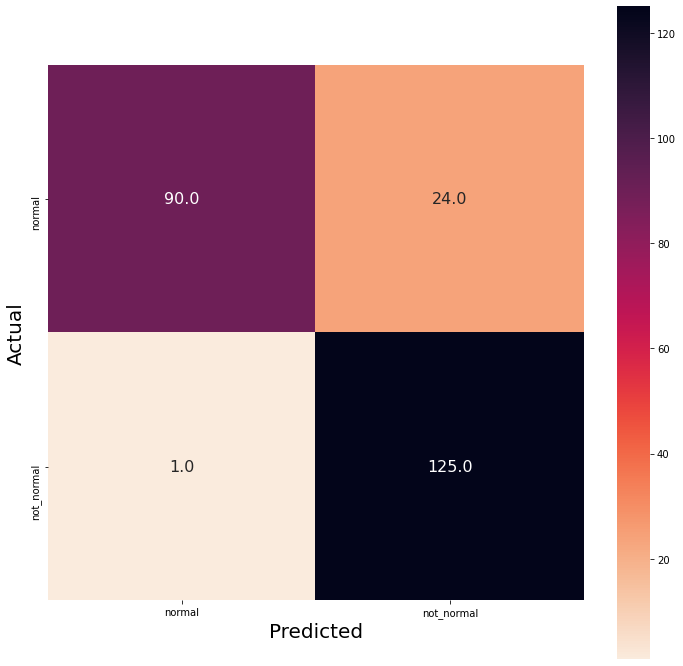

In [80]:
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=["normal","not_normal"], 
                 yticklabels=["normal","not_normal"])
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [53]:
K.clear_session()

240